In [1]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
df = pd.read_csv('data/train.csv')
target = df['loan_status']

In [3]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,total_acc,initial_list_status,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,record_id
0,15000.0,36 months,11.99,498.15,B,B3,Quality Assurance Specialist,4 years,MORTGAGE,70000.0,...,32.0,f,0.0,1.0,INDIVIDUAL,0.0,0.0,295215.0,20500.0,453246940
1,3725.0,36 months,6.03,113.38,A,A1,NaN,NaN,MORTGAGE,52260.0,...,9.0,f,0.0,1.0,INDIVIDUAL,0.0,0.0,25130.0,14200.0,453313687
2,16000.0,36 months,11.14,524.89,B,B2,KIPP NYC,3 years,RENT,67500.0,...,22.0,f,0.0,1.0,INDIVIDUAL,0.0,193.0,41737.0,19448.0,453283543
3,4200.0,36 months,13.33,142.19,C,C3,Receptionist,< 1 year,MORTGAGE,21600.0,...,19.0,w,0.0,1.0,INDIVIDUAL,0.0,165.0,28187.0,14500.0,453447199
4,6500.0,36 months,12.69,218.05,B,B5,Medtox Laboratories,10+ years,RENT,41000.0,...,12.0,f,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,453350283


In [4]:
data = df.drop(['emp_title', 'home_ownership', 'pymnt_plan','record_id', 'earliest_cr_line', 'grade', 'application_type', 'issue_d', 'zip_code', 'policy_code', 'verification_status', 'purpose', 'initial_list_status', 'addr_state','term', 'loan_status', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'collections_12_mths_ex_med', 'acc_now_delinq'], axis=1)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200189 entries, 0 to 200188
Data columns (total 10 columns):
loan_amnt           200189 non-null float64
int_rate            200189 non-null float64
installment         200189 non-null float64
sub_grade           200189 non-null int32
emp_length          200189 non-null float64
annual_inc          200189 non-null float64
open_acc            200189 non-null float64
tot_coll_amt        200189 non-null float64
tot_cur_bal         200189 non-null float64
total_rev_hi_lim    200189 non-null float64
dtypes: float64(9), int32(1)
memory usage: 14.5 MB


In [9]:
data.emp_length.fillna(value=0,inplace=True)
data.tot_coll_amt.fillna(value=df.tot_coll_amt.mean(),inplace=True)
data.tot_cur_bal.fillna(value=df.tot_coll_amt.mean(),inplace=True)
data.total_rev_hi_lim.fillna(value=df.total_rev_hi_lim.mean(),inplace=True)

In [7]:
label_encoder = LabelEncoder()
data['sub_grade'] = label_encoder.fit_transform(df['sub_grade'])

In [8]:
data['emp_length'] = data['emp_length'].map({'< 1 year': 1, '1 year': 2, '2 years': 3,  '3 years': 4,  '4 years': 5,  '5 years': 6,  '6 years': 7,  '7 years': 8,  '8 years': 9,  '9 years': 10,  '10+ years': 11})

In [11]:
from sklearn import preprocessing
dataset1_standardized = preprocessing.scale(data)
dataset1_standardized = pd.DataFrame(dataset1_standardized)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by the scale function.
  


In [12]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [13]:
dataset_sc = StandardScaler().fit_transform(data)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [ ]:
A = []
B = []
C = []

for i in np.linspace(0.1,5,50):
    db = DBSCAN(eps=i, min_samples=10).fit(dataset_sc)

    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    
    sum = 0
    for t in labels:
        if t == -1: 
            sum = sum + 1
    C.append(sum)          
        
    A.append(i)
    B.append(int(n_clusters_))

In [ ]:
results = pd.DataFrame([A,B,C]).T
results.columns = ['distance','Number of clusters','Number of outliers']
results.plot(x='distance',y='Number of clusters',figsize=(10,6))

In [14]:
db = DBSCAN(eps=1, min_samples=10).fit(dataset_sc)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [15]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % n_clusters_)

Estimated number of clusters: 2


In [16]:
db = DBSCAN(eps=1, min_samples=10)
y_db = db.fit_predict(dataset_sc)

y_db1=db
y_db1=y_db+1

cluster = pd.DataFrame(y_db1)

data['cluster'] = cluster

db_mean_cluster = pd.DataFrame(round(data.groupby('cluster').mean(),1))
db_mean_cluster

,loan_amnt,int_rate,installment,sub_grade,emp_length,annual_inc,open_acc,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
cluster,,,,,,,,,,
0,21124.6,14.6,642.0,12.6,6.5,154081.2,15.8,1218.1,323777.8,69536.4
1,13093.5,13.8,403.6,11.1,6.6,66167.4,10.6,79.5,87548.2,26402.5
2,34971.4,12.5,1170.2,8.4,10.3,169500.0,18.7,0.0,504196.4,68500.0


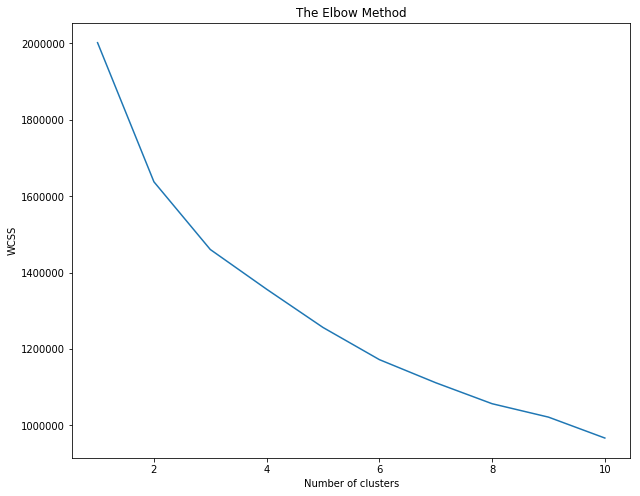

In [17]:
plt.figure(figsize=(10, 8))
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(dataset1_standardized)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [18]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(dataset1_standardized)

y_kmeans1=y_kmeans


cluster = pd.DataFrame(y_kmeans1)

data['K-means'] = cluster

kmeans_mean_cluster = pd.DataFrame(round(data.groupby('K-means').mean(),1))
kmeans_mean_cluster

,loan_amnt,int_rate,installment,sub_grade,emp_length,annual_inc,open_acc,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,cluster
K-means,,,,,,,,,,,
0,24706.8,13.7,748.5,10.9,7.5,117357.1,14.0,103.6,242262.1,52112.6,0.7
1,13485.5,18.5,410.8,18.3,6.5,61622.7,10.6,184.5,75067.4,21318.5,1.0
2,9471.5,11.2,298.7,7.1,6.2,61193.3,10.0,167.2,67679.8,25402.3,1.0


In [23]:
from sklearn import cluster, mixture
mb = cluster.MiniBatchKMeans(n_clusters = 3)
mb_result = mb.fit_predict(dataset1_standardized)
data['MiniKmeans'] = pd.DataFrame(mb_result)
kmeans_minibatch_cluster = pd.DataFrame(round(data.groupby('MiniKmeans').mean(),1))
kmeans_minibatch_cluster

,loan_amnt,int_rate,installment,sub_grade,emp_length,annual_inc,open_acc,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,cluster,K-means
MiniKmeans,,,,,,,,,,,,
0,16955.3,10.5,518.8,6.1,7.5,95531.3,13.2,122.5,180299.8,44094.1,0.9,1.1
1,21539.4,19.0,643.3,19.1,7.5,85302.4,12.3,165.1,132667.5,30006.8,0.9,0.7
2,8071.0,13.4,259.4,10.3,5.5,53099.6,9.1,178.6,47532.3,20848.5,1.0,1.7


In [25]:
data.head()

,loan_amnt,int_rate,installment,sub_grade,emp_length,annual_inc,open_acc,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,cluster,K-means,MiniKmeans
0,15000.0,11.99,498.15,7,5.0,70000.0,17.0,0.000000,295215.000000,20500.00000,1,2,0
1,3725.0,6.03,113.38,0,0.0,52260.0,7.0,0.000000,25130.000000,14200.00000,1,2,2
2,16000.0,11.14,524.89,6,4.0,67500.0,9.0,193.000000,41737.000000,19448.00000,1,2,2
3,4200.0,13.33,142.19,12,1.0,21600.0,9.0,165.000000,28187.000000,14500.00000,1,2,2
4,6500.0,12.69,218.05,9,11.0,41000.0,8.0,159.822179,159.822179,29447.61355,1,2,2


In [ ]:
spectral = cluster.SpectralClustering(n_clusters = 3)
sp_result= spectral.fit_predict(dataset1_standardized)
data['spectral'] = pd.DataFrame(mb_result)
kmeans_spectral_cluster = pd.DataFrame(round(data.groupby('spectral').mean(),1))
data.head()